In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(4503, 2)

In [3]:
df.head()

,Time,domain
0,2022-03-31 06:35:59,docs.google.com
1,2022-03-31 06:37:21,web.whatsapp.com
2,2022-04-06 11:11:57,web.whatsapp.com
3,2022-04-12 09:04:18,web.whatsapp.com
4,2022-04-12 10:29:35,www.google.com


In [4]:
df.tail()

,Time,domain
4498,2022-11-07 21:13:04,my.umbc.edu
4499,2022-11-07 21:13:32,webauth.umbc.edu
4500,2022-11-07 21:13:32,webauth.umbc.edu
4501,2022-11-07 21:13:33,webauth.umbc.edu
4502,2022-11-07 21:13:33,webauth.umbc.edu


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-03-31 06:35:59,docs.google.com
1,2022-03-31 06:37:21,web.whatsapp.com
2,2022-04-06 11:11:57,web.whatsapp.com
3,2022-04-12 09:04:18,web.whatsapp.com
4,2022-04-12 10:29:35,www.google.com


In [14]:
df['domain'].value_counts()[:50]

github.com                          1165
webauth.umbc.edu                     936
localhost:8888                       396
my.umbc.edu                          374
www.google.com                       354
blackboard.umbc.edu                  180
courses.3rdmil.com                   145
csprd-web.ps.umbc.edu                 84
myretrievercare.umbc.edu              79
ceac.state.gov                        72
localhost:8889                        57
web.whatsapp.com                      53
colab.research.google.com             39
www.amazonuniversity.jobs             35
mail.google.com                       30
isss-portal.umbc.edu                  30
umbcstudents-md.safecolleges.com      23
data.world                            20
accounts.google.com                   20
sis.telangana.gov.in                  19
sist.sathyabama.ac.in                 16
app.joinhandshake.com                 15
docs.google.com                       12
amcatglobal.aspiringminds.com         12
us.bbcollab.com 

<AxesSubplot:>

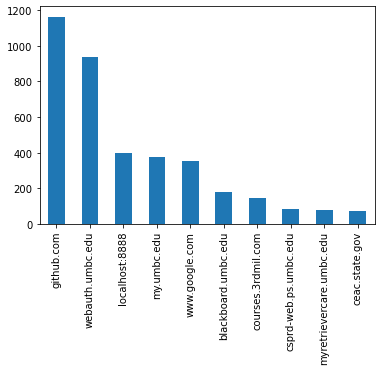

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      74
1     268
2      60
3     123
4      10
5      36
6       5
7      10
8      56
9      83
10    139
11    216
12    260
13    257
14    106
15    131
16    507
17    181
18    402
19    445
20    356
21    314
22    323
23    141
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

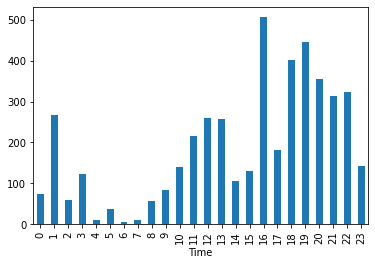

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-03-31 06:35:59,docs.google.com,Thursday,3
1,2022-03-31 06:37:21,web.whatsapp.com,Thursday,3
2,2022-04-06 11:11:57,web.whatsapp.com,Wednesday,2
3,2022-04-12 09:04:18,web.whatsapp.com,Tuesday,1
4,2022-04-12 10:29:35,www.google.com,Tuesday,1


In [19]:
df['Day'].value_counts()

Tuesday      932
Wednesday    863
Sunday       757
Thursday     705
Monday       483
Saturday     396
Friday       367
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    483
1    932
2    863
3    705
4    367
5    396
6    757
Name: DayIndex, dtype: int64

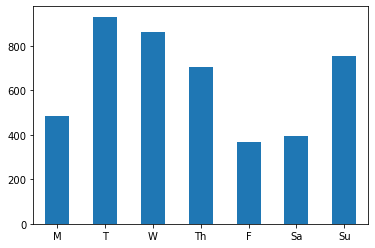

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-03-31 06:35:59,docs.google.com,Thursday,3,False
1,2022-03-31 06:37:21,web.whatsapp.com,Thursday,3,False
2,2022-04-06 11:11:57,web.whatsapp.com,Wednesday,2,False
3,2022-04-12 09:04:18,web.whatsapp.com,Tuesday,1,False
4,2022-04-12 10:29:35,www.google.com,Tuesday,1,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
23,2022-04-17 12:02:19,web.whatsapp.com,Sunday,6,True
24,2022-04-17 12:04:48,www.google.com,Sunday,6,True
25,2022-04-17 12:05:00,www.trendytechjournals.com,Sunday,6,True
26,2022-04-17 12:06:23,www.trendytechjournals.com,Sunday,6,True
27,2022-04-17 12:07:25,www.trendytechjournals.com,Sunday,6,True


In [25]:
weekday['domain'].value_counts()[:5]

github.com          997
webauth.umbc.edu    717
my.umbc.edu         292
www.google.com      259
localhost:8888      259
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

webauth.umbc.edu      219
github.com            168
localhost:8888        137
courses.3rdmil.com    132
www.google.com         95
Name: domain, dtype: int64

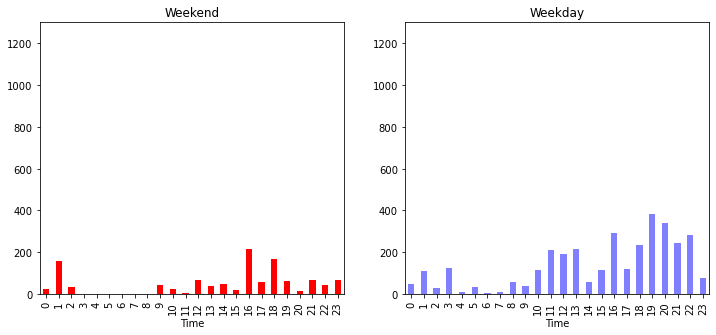

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

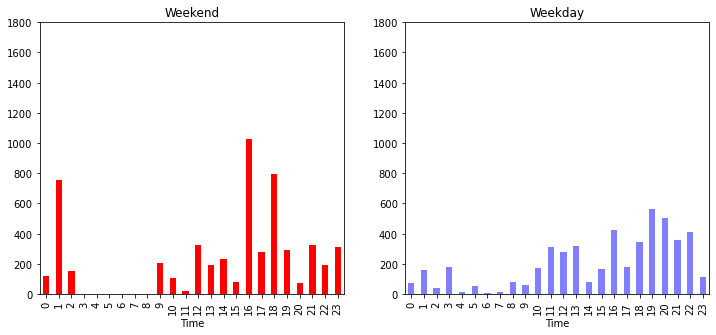

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

github.com                  1165
webauth.umbc.edu             936
localhost:8888               396
my.umbc.edu                  374
www.google.com               354
blackboard.umbc.edu          180
courses.3rdmil.com           145
csprd-web.ps.umbc.edu         84
myretrievercare.umbc.edu      79
ceac.state.gov                72
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

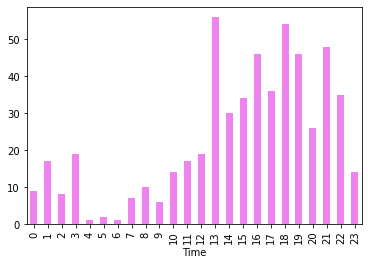

In [33]:
_= show_domain_stats('google', 'violet')

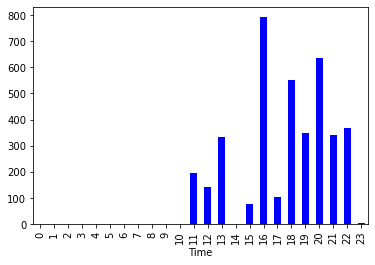

In [34]:
_= show_domain_stats('github', 'blue')

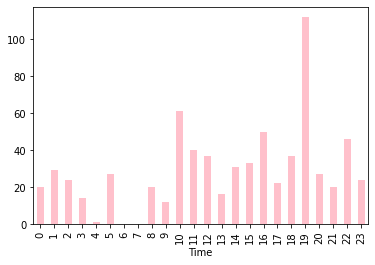

In [35]:
_ = show_domain_stats('my.umbc.edu', 'pink')


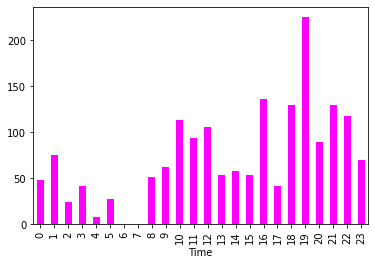

In [36]:
_ = show_domain_stats('webauth.umbc.edu|csprd-web.ps.umbc.edu', 'magenta')

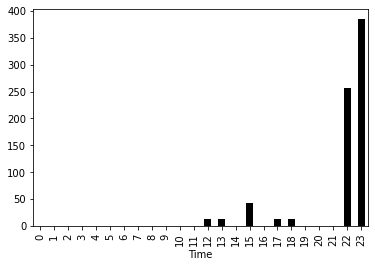

In [37]:
_ = show_domain_stats('amazon|youtube', 'black')

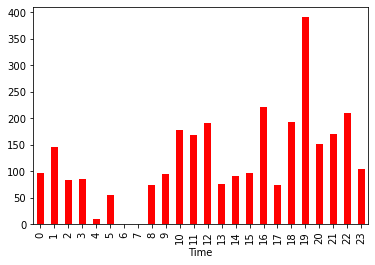

In [38]:
_=show_domain_stats('umbc|myretrievercare.umbc.edu|blackboard.umbc.edu', 'red')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. It is his personal computer as most of the websites are university and study websites.


2. He is not employed as we can see that he is active in myumbc website which is student website.

3. The majority of the time is spent on the college website, and very less free time is spent on online websites.

4. He is an international student and using college website for attending his courses. And it can also be observed that there is less activity on shopping websites which concludes that he might use his computer for study use only.